<a href="https://colab.research.google.com/github/willkwon-math/class-for-deeplearning/blob/master/Python_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본개념

numpy를 torch.tensor로 바꾸는 작업

> torch.from_numpy(np.array)




In [1]:
import torch
import numpy as np

a=np.array([1,2,3])
t=torch.from_numpy(a)

print(t)

tensor([1, 2, 3])


## Linear regression



In [9]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init #초기화

## generating the data

num_data = 1000
num_epoch = 500
loss_arr = []

x=init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x+3
y_noise = 2*(x+noise)+3

# model

model = nn.Linear(1,1) #특성수
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

#learning

label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,label)
  loss.backward()
  optimizer.step() 

  if i % 10 == 0:
    print('epoch = {}, loss = {}'.format(i,loss.data))
  loss_arr.append(loss.detach().numpy()) 


epoch = 0, loss = 11.493937492370605
epoch = 10, loss = 9.207335472106934
epoch = 20, loss = 7.074784278869629
epoch = 30, loss = 5.3087568283081055
epoch = 40, loss = 4.2302117347717285
epoch = 50, loss = 3.824904203414917
epoch = 60, loss = 3.628530263900757
epoch = 70, loss = 3.4832327365875244
epoch = 80, loss = 3.3707125186920166
epoch = 90, loss = 3.2804110050201416
epoch = 100, loss = 3.196610450744629
epoch = 110, loss = 3.1195719242095947
epoch = 120, loss = 3.0449187755584717
epoch = 130, loss = 2.9735913276672363
epoch = 140, loss = 2.905266046524048
epoch = 150, loss = 2.838123083114624
epoch = 160, loss = 2.7744970321655273
epoch = 170, loss = 2.7141001224517822
epoch = 180, loss = 2.6563522815704346
epoch = 190, loss = 2.6005935668945312
epoch = 200, loss = 2.5470354557037354
epoch = 210, loss = 2.4958388805389404
epoch = 220, loss = 2.4468770027160645
epoch = 230, loss = 2.3992507457733154
epoch = 240, loss = 2.353050947189331
epoch = 250, loss = 2.308793544769287
epoch 

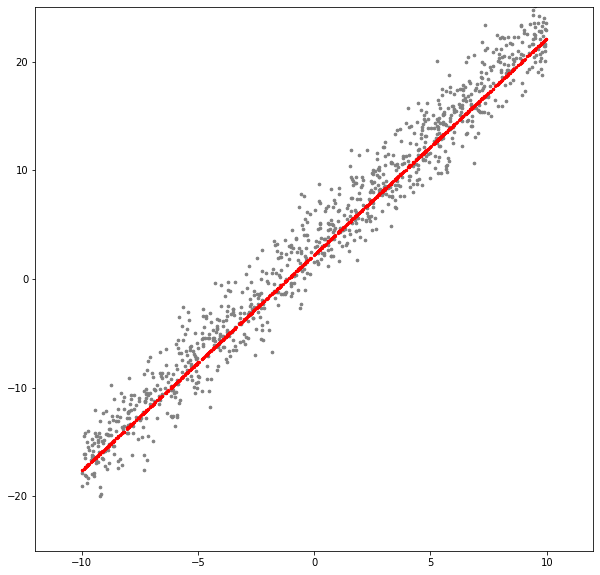

In [11]:
#visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(), s=7, c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(), s=5, c="red")
plt.axis([-12,12,-25,25])
plt.show()

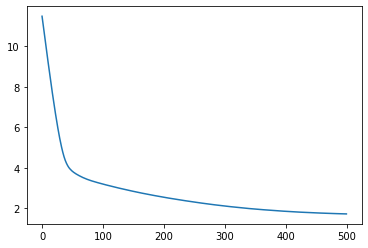

In [12]:
plt.plot(loss_arr)
plt.show()

## Polynomial regression

epoch = 0, loss = 34.703975677490234
epoch = 10, loss = 34.3166389465332
epoch = 20, loss = 33.868568420410156
epoch = 30, loss = 33.09217071533203
epoch = 40, loss = 30.98358726501465
epoch = 50, loss = 19.973861694335938
epoch = 60, loss = 10.396931648254395
epoch = 70, loss = 9.941884994506836
epoch = 80, loss = 9.502447128295898
epoch = 90, loss = 9.078156471252441
epoch = 100, loss = 8.672039985656738
epoch = 110, loss = 8.283394813537598
epoch = 120, loss = 7.922233581542969
epoch = 130, loss = 7.5678486824035645
epoch = 140, loss = 7.218185901641846
epoch = 150, loss = 6.8681559562683105
epoch = 160, loss = 6.514639854431152
epoch = 170, loss = 6.135113716125488
epoch = 180, loss = 5.743600845336914
epoch = 190, loss = 5.3620524406433105
epoch = 200, loss = 4.997425556182861
epoch = 210, loss = 4.646986484527588
epoch = 220, loss = 4.321850776672363
epoch = 230, loss = 7.529819965362549
epoch = 240, loss = 7.4985857009887695
epoch = 250, loss = 6.783753395080566
epoch = 260, los

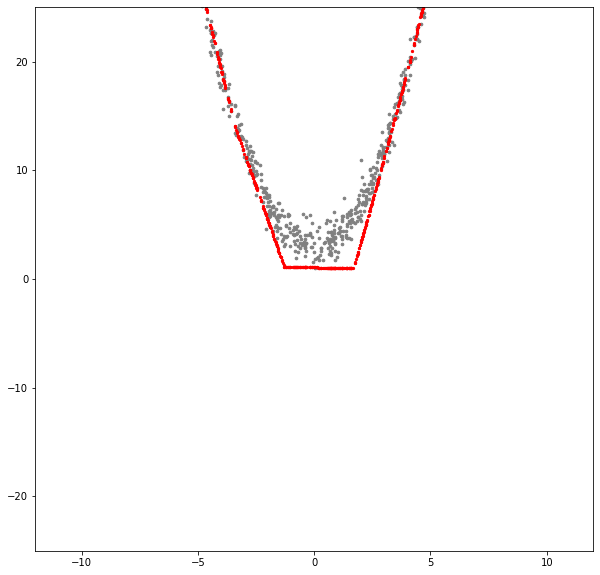

In [16]:
## dataset

num_data = 1000
num_epoch = 500
loss_arr = []

x=init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = (x**2)+3
y_noise = y + noise


## model

model = nn.Sequential(
 nn.Linear(1,6),
 nn.ReLU(),
 nn.Linear(6,10),
 nn.ReLU(),
 nn.Linear(10,6),
 nn.ReLU(),
 nn.Linear(6,1),
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

## learning
 
label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,label)
  loss.backward()
  optimizer.step() 

  if i % 10 == 0:
    print('epoch = {}, loss = {}'.format(i,loss.data))
  loss_arr.append(loss.detach().numpy()) 

plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(), s=7, c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(), s=5, c="red")
plt.axis([-12,12,-25,25])
plt.show()

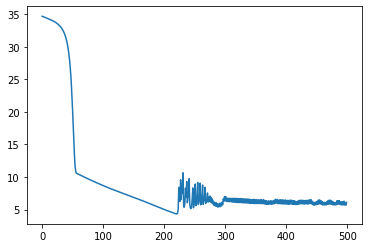

In [17]:
plt.plot(loss_arr)
plt.show()